# ENPH 213 - Week 7 Lab

In this lab, we will be working on Discrete Fourier Transforms and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab7, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10).

## Part 1

Create two windowing functions.

The first is a Trapezoidal Window function $trapWindow(x)$ that rises in the first 10% and falls in the final 10% of the points.  It should be at its maximum value for all points in between.

The second function is $sineWindow(x)$ that uses the first lobe of a sine wave (from 0 to $\pi$).

Both of these window functions should accomodate an input data set with an arbitrary, even number of points.  

Plot the functions for 50 points within the range of $-1 \leq x \leq 1$.


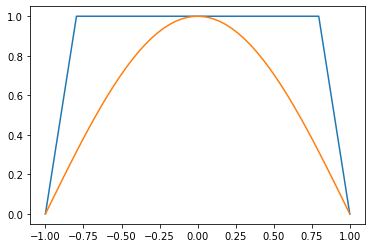

In [1]:
#Libraries
import numpy as np
from matplotlib import pyplot as plt

#Default x value used
x = np.linspace(-1,1,50)

#Trapezoid window (creates the base figure)
def trapWindow(x):
    number = int(0.1*len(x))
    
    trapY = np.linspace(-1,1,len(x))
    
    #First 10%
    for i in range(0,number):
        trapY[i] = i/number
       
    #Middle
    for j in range(number, len(x)-number):
        trapY[j] = 1
    
    #Last 10%
    for k in range(len(x)-number,len(x)):
        trapY[k] = 1-(k-int((len(x)-number-1)))/number
        
    return trapY

#Sine Window function
def sineWindow(x):
    number = len(x)
    y = np.sin(x)
    
    #Scale the sin to default here (period of 1 effectively)
    for i in range(number):
        y[i] = np.sin((i*np.pi)/(number-1))
        
    return y

#Plot the default functions!
plt.plot(x,trapWindow(x))
plt.plot(x,sineWindow(x))
plt.show()

# Part 2

Create a data set of the linear funcion $f(t) = 2t$ with 30 regularly spaced points between  $-\pi \leq t \leq \pi$.  Manually set the first and last points to zero as a basic windowing protocol.  This creates a sawtooth function.

Create a function $myDFT(t, y)$ that calculates and prints the $a_k$ and $b_k$ coefficients using the forms for discrete Fourier Transforms.  Once found, create a second function $plotFourier(t, ak, bk, omega)$ that returns the evaluated Fourier expansion and plots the Fourier series expansion using the Fourier coefficients as input.  Plot the function using 201 points in graph.

Remember that when you remove the last point, your data set will have an odd number of points. 

Coefficients for the 30 point sample:
[ 9.43689571e-16 -3.88578059e-16  8.88178420e-16 -4.44089210e-16
 -5.55111512e-16  3.88578059e-16 -1.41553436e-15  2.00880979e-15
 -1.12410081e-15  8.32667268e-16  1.30451205e-15 -2.10942375e-15
  2.94209102e-15 -2.33146835e-15  1.88737914e-15]
[ 3.85152899 -1.90298658  1.24318863 -0.90539217  0.69618235 -0.55102593
  0.44220521 -0.35579905  0.28400702 -0.2220756   0.16689666 -0.11630119
  0.06867173 -0.02271096]


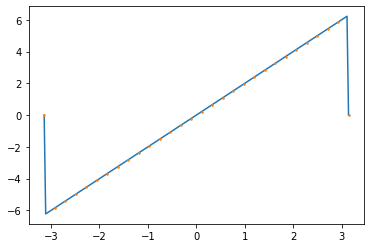

In [2]:
w=1

#Function that we want (sets first and last to 0)
def f(t):
    #Set the first and last to 0
    returnVal = np.zeros(len(t))
    returnVal[0] = 0
    returnVal[len(t)-1] = 0
    
    #Everything else f(t)=2t
    for i in range(1,len(t)-1):
        returnVal[i]=2*t[i]
    #return!
    return returnVal
    
#plot party!    
t = np.linspace(-np.pi,np.pi,30)
y = f(t)

#This function calculates the a and b values
def myDFT(t,y):
    #Do some handy floor division!
    kmax = len(t)//2
       
    #Make the two coeff arrays
    a = np.zeros(kmax)
    b = np.zeros(kmax-1)
    
    #Fill them up!
    for i in range(len(t)-1):
        #a
        for j in range(0,kmax):
            a[j]+=(1/kmax)*y[i]*np.cos(j*w*t[i])
        #b
        for k in range(1,kmax):
            b[k-1]+=(1/kmax)*y[i]*np.sin(k*w*t[i])

    return a,b

#This function plots the fourier transformed values (does a large summation!)
def plotFourier(t,ak,bk,omega):
    pSum = np.zeros(len(t))
    pSum = ak[0]/2
    
    #Sum up the values for each point!
    for k in range(1,int(len(t)/2)):
        pSum+=ak[k]*np.cos(k*omega*t)
        pSum+=bk[k-1]*np.sin(k*omega*t)
    
    plt.plot(t,pSum)
    return pSum
    
a,b = myDFT(t,y)
print("Coefficients for the 30 point sample:")
print(a)
print(b)

#Now evaluate with 201 points
tFourEval = np.linspace(-np.pi,np.pi,201)
aEval,bEval = myDFT(tFourEval,f(tFourEval))

plotFourier(tFourEval,aEval,bEval,w)
plt.plot(t,y,'.',ms=3)
plt.show()

# Part 3

Use the two windowing functions from Part 1 (separately) on the sawtooth function from Part 2.  Determine and print the coefficients and plot the figures.

**Question: Which windowing function seems to work best?**

Trapezoid Coeffs:
[ 7.49400542e-16 -6.10622664e-16  9.57567359e-16 -5.27355937e-16
 -6.24500451e-16  3.26128013e-16 -1.48492330e-15  2.12069945e-15
 -1.08593690e-15  7.21644966e-16  1.23512311e-15 -2.09554596e-15
  2.98372438e-15 -2.35922393e-15  1.97064587e-15]
[ 3.63866496 -1.50117025  0.69654518 -0.27151348  0.03751314  0.07412016
 -0.10304798  0.08047158 -0.03349611 -0.01532474  0.04968337 -0.06091183
  0.0483255  -0.01824132]


Sin Coeffs:
[ 6.31439345e-16 -2.01227923e-16  9.02056208e-17 -2.63677968e-16
 -2.01227923e-16 -2.18575158e-16 -5.60315683e-16  8.75601674e-16
 -2.02095285e-16  5.08273978e-16  3.95516953e-16 -6.59194921e-16
  6.59194921e-16 -5.75928194e-16  1.13103971e-15]
[ 2.18807438e+00 -1.75023896e-01  4.81920974e-02 -1.97985277e-02
  9.98413522e-03 -5.70026004e-03  3.52964051e-03 -2.30678965e-03
  1.55891696e-03 -1.06867971e-03  7.25933940e-04 -4.69987371e-04
  2.64495737e-04 -8.54223456e-05]




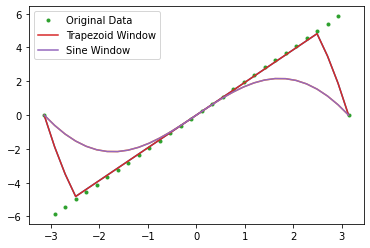

In [3]:
w=1

#First, create the windowed y values
yTrap = trapWindow(t)*f(t)
ySin = sineWindow(t)*f(t)

#Next, find the coefficients!
TrapCoeffA, TrapCoeffB = myDFT(t,yTrap)
SinCoeffA, SinCoeffB = myDFT(t,ySin)

#Print the coefficients!
print("Trapezoid Coeffs:")
print(TrapCoeffA)
print(TrapCoeffB)

print("\n")

print("Sin Coeffs:")
print(SinCoeffA)
print(SinCoeffB)
print("\n")

#Finally, plot the fourier transformed values
TrapPrint = plotFourier(t,TrapCoeffA,TrapCoeffB,w)
SinPrint = plotFourier(t,SinCoeffA,SinCoeffB,w)

#Time to plot the big masterpiece!
plt.plot(t,f(t),'.',label='Original Data')
plt.plot(t,TrapPrint,label='Trapezoid Window')
plt.plot(t,SinPrint,label='Sine Window')
plt.legend()
plt.show()

#ANSWER!!!! The trapezoid window seems to fit best, as it follows the linear portion longer, and does not deviate quickly unlike the sin window. 

# Part 4

Create a function $cDFT(t, y)$ that calculates and prints the $c_k$ coefficients using the complex form for discrete Fourier transforms. Be sure to comment on the format of the output array.  Once found, plot the absolute value of the coefficients against the "frequencies" $k \omega$ of the Fourier transform.  Note, there are no negative frequencies, but it is sometimes useful to plot them for visual analysis.

C Coefficients:
[ 3.25665421e-16+0.j         -3.25665421e-16-1.92576449j
  4.14483263e-16+0.95149329j -2.07241631e-16-0.62159432j
 -2.36847579e-16+0.45269608j  1.92438658e-16-0.34809117j
 -7.54951657e-16+0.27551296j  1.02695630e-15-0.2211026j
 -4.51490697e-16+0.17789952j  3.84877315e-16-0.14200351j
  5.92118946e-16+0.1110378j  -1.06581410e-15-0.08344833j
  1.48029737e-15+0.05815059j -1.27305573e-15-0.03433586j
  8.58572472e-16+0.01135548j  5.92118946e-16+0.01135548j
 -1.15463195e-15+0.03433586j  5.92118946e-16-0.01135548j
  8.58572472e-16-0.01135548j -1.27305573e-15+0.03433586j
  1.48029737e-15-0.05815059j -1.06581410e-15+0.08344833j
  5.92118946e-16-0.1110378j   3.84877315e-16+0.14200351j
 -4.51490697e-16-0.17789952j  1.02695630e-15+0.2211026j
 -7.54951657e-16-0.27551296j  1.92438658e-16+0.34809117j
 -2.36847579e-16-0.45269608j -2.07241631e-16+0.62159432j
  4.14483263e-16-0.95149329j -3.25665421e-16+1.92576449j]




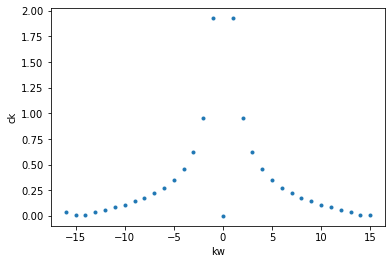

In [5]:
#Function that performs a discrete fourier transform
def cDFT(t,y):
    #Size of array
    n = t.size
    #Omega Value
    omega = 1
    #kmax reiterated
    kmax = n//2
    
    #Now we want to find our c complex coefficients
    cA = np.array(np.zeros(2*(kmax+1)),dtype = 'complex')
    #Loop thru from (-kmax-1 --> kmax+1)
    for k in range(-kmax-1,kmax+1):
        cA[k] = np.sum(y*np.exp(-1j*k*omega*t))/n 
    return cA

#Here, make the c coeffs and k*w, and then plot them.
cK = cDFT(t,y)
print("C Coefficients:")
print(cK)
print("\n")
n=t.size
omega = 1

#Again, use floor division
kmax = n//2

#now we just want to create the kw array (straightforward from -kmax-1 -> kmax+1)
kw = np.ones(2*(kmax+1))
for i in range(-kmax-1,kmax+1):
    kw[i] = i*omega
    
#All done, now just plot!
plt.plot(kw, np.abs(cK),'.')
plt.xlabel('kw')
plt.ylabel('ck')
plt.show()

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.